# Working with Sample Data

### Import the packages and data 

In [20]:
from IPython.display import Image
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")
%matplotlib inline

matplotlib.rcParams['figure.figsize'] = [12, 12]
pd.set_option("precision", 5)

import pyarrow.parquet as pq


In [21]:
data = pd.read_csv('Data/customer_data.csv')
#data = table.to_pandas()

In [22]:
del data["Unnamed: 0"]

In [163]:
data.head()

,FrequencyofVisits,Age,Sex,Payer,Facility,Cluster,cluster_id
0,1,37.0,Feminino,PARTICULARES,CCTV,1,1
1,15,37.0,Feminino,IASFA,CCM,1,1
2,13,37.0,Feminino,MÉDIS,HCD,0,0
3,32,37.0,Feminino,ALLIANZ,CCA,1,1
4,1,37.0,Feminino,ADVANCECARE,CCM,1,1


In [164]:
data = data[0:1000]

## Working with K-means

### Loading the data 

In [25]:
data.dtypes

UniqueID              object
FrequencyofVisits      int64
Age                  float64
Sex                   object
Payer                 object
Facility              object
dtype: object

In [26]:
data = data.drop(columns="UniqueID")

In [165]:
data.isnull().values.any()

False

In [166]:
numerical_data = data.select_dtypes(np.number)
categorical_data = data.select_dtypes([object, "category"])

In [167]:
from sklearn.preprocessing import MinMaxScaler

numerical_data_normalized = MinMaxScaler().fit_transform(numerical_data)
numerical_data_normalized = pd.DataFrame(
                    numerical_data_normalized,
                    columns=numerical_data.columns) 

In [168]:
categorical_data_codified = pd.get_dummies(
                                    categorical_data, 
                                    drop_first=True
)

In [169]:
data_processed = pd.concat([
                            numerical_data_normalized,
                            categorical_data_codified
                        ], axis=1
)
data_processed.head(5)

,FrequencyofVisits,Age,Cluster,cluster_id,Sex_Masculino,Sex_Missing,Payer_ADSE,Payer_ADVANCECARE,Payer_ALLIANZ,Payer_ARS,...,Facility_['CCB' 'HCD'],Facility_['CCC' 'CCS'],Facility_['CCC' 'CCSDR'],Facility_['CCC' 'HCD'],Facility_['CCM' 'CCTV'],Facility_['CCTV' 'HCD'],Facility_['CCTV' 'HCIS'],Facility_['HCD' 'HCIS'],Facility_['HCD' 'HCS'],Facility_['HCP' 'ICDT']
0,0.00000,0.24194,0.5,0.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.08642,0.24194,0.5,0.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.07407,0.24194,0.0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.19136,0.24194,0.5,0.5,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0.00000,0.24194,0.5,0.5,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
data_processed.isnull().values.any()

False

In [33]:
data_processed.shape

(810341, 589)

### K-means

In [34]:
from sklearn.cluster import KMeans

In [35]:
data_processed= data_processed.dropna()

In [36]:
estimator_kmeans = KMeans(random_state=42, n_clusters=3)
estimator_kmeans.fit(data_processed)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

In [149]:
cluster_labels = estimator_kmeans.labels_
#cluster_labels

In [150]:
#seperate the data into test and train and use train all the way and use ".predict" for the test

In [151]:
centroids = estimator_kmeans.cluster_centers_

In [152]:
centroids.shape

(3, 589)

In [153]:
estimator_kmeans.inertia_

1306915.6048767655

In [154]:
from sklearn.metrics import euclidean_distances

In [155]:
centroid_distances = euclidean_distances(centroids)

In [156]:
centroid_distances.shape

(3, 3)

In [157]:
estimator_kmeans.labels_.shape

(810341,)

In [158]:
data['cluster_id'] = cluster_labels

In [170]:
data.head()

,FrequencyofVisits,Age,Sex,Payer,Facility,Cluster,cluster_id
0,1,37.0,Feminino,PARTICULARES,CCTV,1,1
1,15,37.0,Feminino,IASFA,CCM,1,1
2,13,37.0,Feminino,MÉDIS,HCD,0,0
3,32,37.0,Feminino,ALLIANZ,CCA,1,1
4,1,37.0,Feminino,ADVANCECARE,CCM,1,1


In [171]:
def cluster_summary(cluster_id):
    cluster = data[data.cluster_id==cluster_id]
    cluster_summary = cluster[categorical_data.columns].mode().to_dict(orient="records")[0]
    cluster_summary.update(cluster.mean().to_dict())
    return cluster_summary

In [161]:
cluster = data[data.Cluster==2]
cluster[categorical_data.columns].mode().to_dict(orient="records")

[{'Sex': 'Masculino', 'Payer': 'ADSE', 'Facility': 'HCP'}]

In [172]:
cluster_summary(1)

{'Sex': 'Feminino',
 'Payer': 'ADSE',
 'Facility': 'HCP',
 'FrequencyofVisits': 7.673511293634497,
 'Age': 58.63244353182751,
 'Cluster': 1.0,
 'cluster_id': 1.0}

In [84]:
# Distance between centroid of cluster 0 and 2 
centroid_distances[0,2]

1.2436452524992418

In [173]:
def cluster_comparison(*cluster_ids):
    summaries = []
    for cluster_id in cluster_ids:
        summaries.append(cluster_summary(cluster_id))
    return pd.DataFrame(summaries).set_index("cluster_id").T

In [175]:
cluster_comparison(0,1,2)

cluster_id,0.0,1.0,2.0
Age,56.313,58.632,55.155
Cluster,0,1,2
Facility,HCD,HCP,HCIS
FrequencyofVisits,9.4194,7.6735,9.6115
Payer,MULTICARE,ADSE,ADSE
Sex,Feminino,Feminino,Masculino


In [176]:
def kmeans_cluster(df, n_clusters=3):
    model = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = model.fit_predict(df)
    cluster_results = df.copy()
    cluster_results['Cluster'] = clusters
    return cluster_results

def graph_summary_clustering(results):
    cluster_size = results.groupby(['Cluster']).size().reset_index()
    cluster_size.columns = ['Cluster', 'Count']
    cluster_means = results.groupby(['Cluster'], as_index=False).mean()
    cluster_summary = pd.merge(cluster_size, cluster_means, on='Cluster')
    cluster_summary = cluster_summary.drop(["Count"], axis=1).set_index("Cluster")
    return cluster_summary[sorted(cluster_summary.columns)]

In [177]:
cluster_results = kmeans_cluster(data_processed, 3)
cluster_summary = graph_summary_clustering(cluster_results);
cluster_summary

,Age,Facility_CCAL,Facility_CCB,Facility_CCC,Facility_CCM,Facility_CCMF,Facility_CCS,Facility_CCSDR,Facility_CCSJM,Facility_CCTV,...,Payer_['ALLIANZ' 'MULTICARE'],Payer_['ARS' 'MULTICARE'],Payer_['FUTURE HEALTHCARE' 'PARTICULARES'],Payer_['JOSE DE MELLO SAUDE' 'MÉDIS'],Payer_['MULTICARE' 'MÉDIS'],Payer_['MULTICARE' 'PARTICULARES'],Payer_['MÉDIS' 'PARTICULARES'],Sex_Masculino,Sex_Missing,cluster_id
Cluster,,,,,,,,,,,,,,,,,,,,,
0,0.55344,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00461,0.00000,0.00000,0.00461,0.00000,0.34101,0.20276,0.0
1,0.59085,0.03285,0.04928,0.11910,0.02259,0.01232,0.03491,0.02259,0.01027,0.09651,...,0.00205,0.00000,0.00000,0.00000,0.00205,0.00000,0.00411,0.00000,0.25667,0.5
2,0.53476,0.04392,0.05405,0.11486,0.00676,0.03041,0.02365,0.03716,0.01351,0.06419,...,0.00000,0.00338,0.00000,0.00338,0.00338,0.00000,0.00338,1.00000,0.00000,1.0


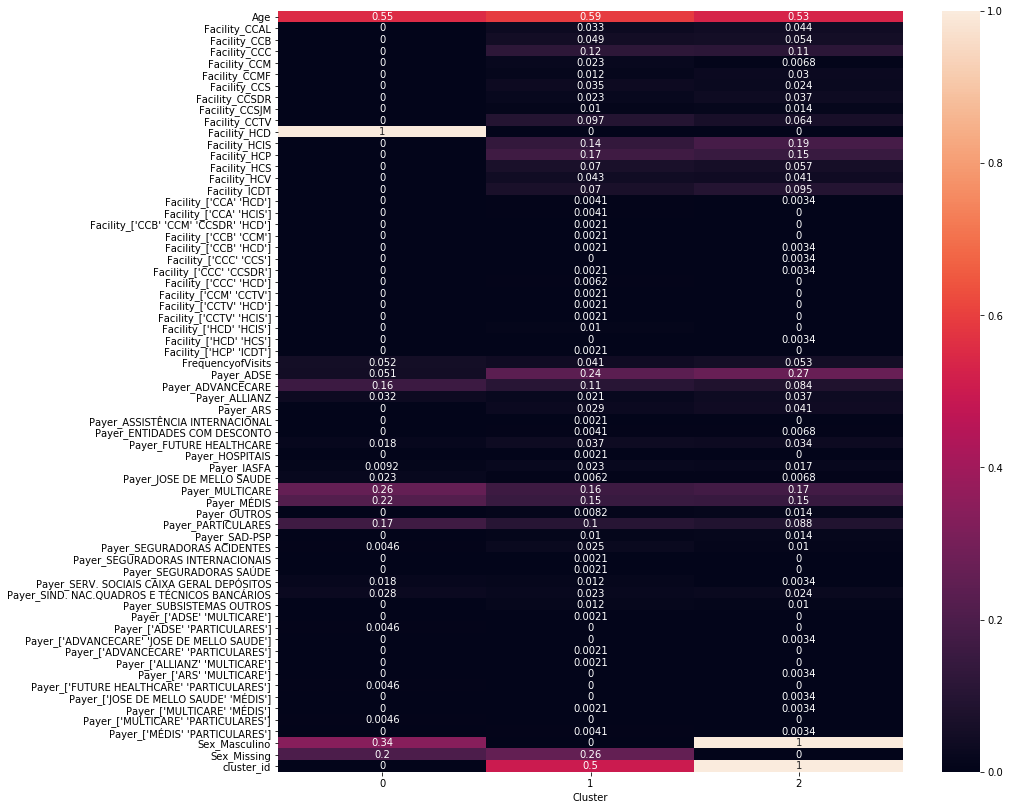

In [178]:
matplotlib.rcParams['figure.figsize'] = [14, 14]
import seaborn as sns
sns.heatmap(cluster_summary.transpose(), annot=True);

### Ideal number of clusters?

In [179]:
from scipy.spatial.distance import cdist

In [180]:
total_variance = cdist(
    XA=data_processed, 
    XB=np.array([data_processed.mean()]))

In [181]:
total_variance_sum = total_variance.sum()

In [182]:
#functions to calculate the Within-Cluster sum of squares (WSS)
def cluster_variance(cluster_id, cluster_centroid, cluster_labels):
    cluster_elements = data_processed[cluster_labels==cluster_id]
    return cdist(XA=cluster_elements, XB=np.array([cluster_centroid])).sum()

#explained variance (defined as the reduction of variance compared to the total variance,...
# ... which would be the variance where k=1).
def variance_measure(estimator_kmeans, total_variance):
    clusters_labels = estimator_kmeans.labels_
    wss = 0
    for i, cluster_id in enumerate(np.unique(clusters_labels)):
        cluster_centroid = estimator_kmeans.cluster_centers_[i]
        wss += cluster_variance(cluster_id, cluster_centroid, clusters_labels)
    return (total_variance-wss) / total_variance

In [183]:
# Function that returns the inertia.
def inertia_measure(estimator_kmeans):
    return estimator_kmeans.inertia_

In [184]:
# Create a function that evaluates the intertia and percentage variance explained for a value of K
def evaluate_k_kmeans(k, scoring, **kwargs):
    scoring_measure = None
    if scoring=="inertia":
        scoring_measure = inertia_measure
    elif scoring=="variance":
        scoring_measure = variance_measure
        
    estimator_kmeans = KMeans(random_state=42, n_clusters=k)
    estimator_kmeans.fit(data_processed)
    return scoring_measure(estimator_kmeans, **kwargs)

In [185]:
results_k = {}
range_k = [1,2,3,4,5,6,7,8,9] #range_k gives the number of clusters to evaluate their inertia and variance
for k in range_k:
    results_k[k] = (
        evaluate_k_kmeans(k, "inertia"), 
        evaluate_k_kmeans(k, "variance", total_variance=total_variance_sum), 
    )

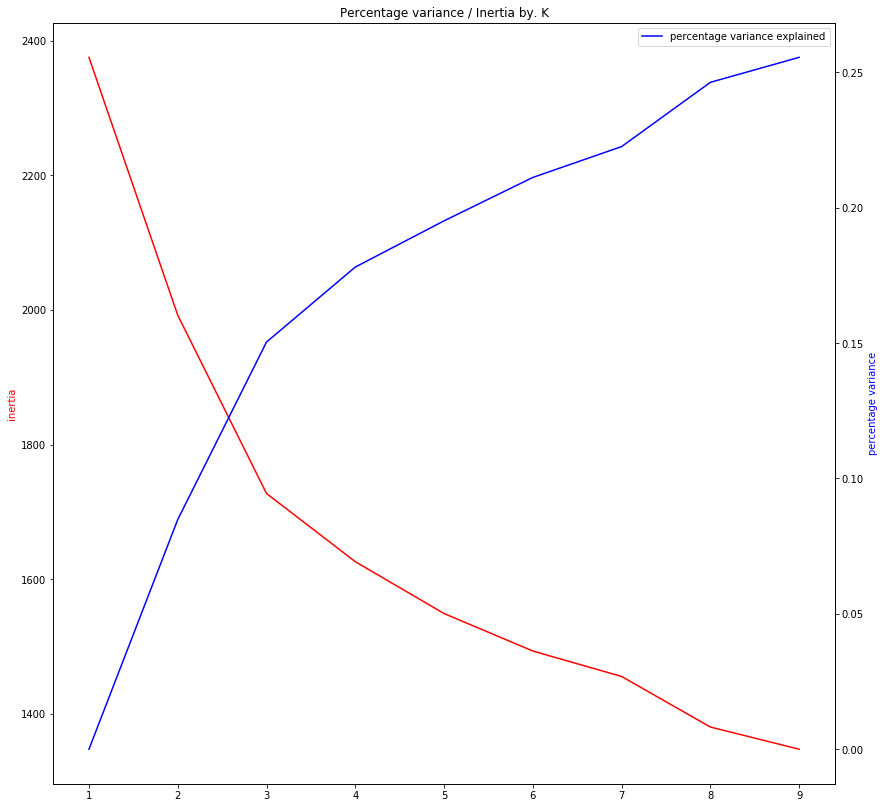

In [186]:
fig, ax1 = plt.subplots()

ax1.plot(
    [c[0] for c in results_k.items()],
    [c[1][0] for c in results_k.items()], label="inertia", color="red")
ax1.set_ylabel('inertia', color="red")


ax2 = ax1.twinx()
ax2.plot(
    [c[0] for c in results_k.items()],
    [c[1][1] for c in results_k.items()], label="percentage variance explained", color="blue")
ax2.set_ylabel('percentage variance', color='blue')

plt.xlabel("K")
plt.legend()
plt.title("Percentage variance / Inertia by. K");

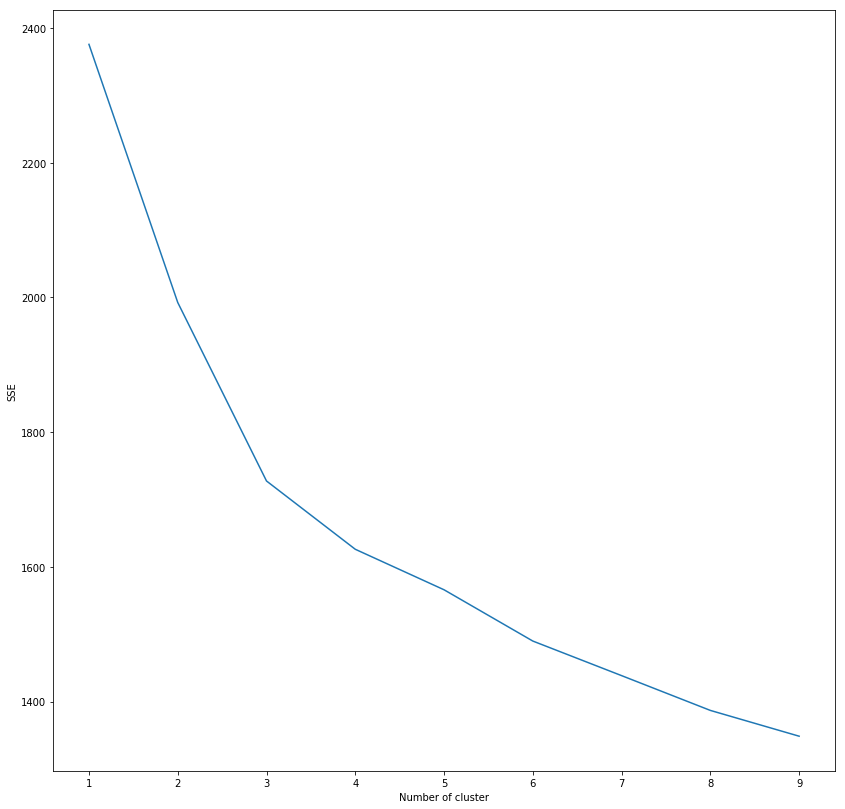

In [187]:
sse = {}
for k in range(1, 10):
   kmeans = KMeans(n_clusters=k).fit(data_processed)
   #print(data["clusters"])
   sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

## Change the number of clusters 

In [188]:
clusterer = KMeans(n_clusters=6)
clusterer.fit(data_processed)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [189]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import silhouette_score

In [190]:
def silhouette_score_cv(clusterer, X, y=None):
    cluster_labels = clusterer.fit_predict(X)
    return silhouette_score(X, cluster_labels)

In [191]:
cross_val_score(clusterer, data_processed, y=None, 
                scoring=silhouette_score_cv, cv=3).mean() #a small value means it is well matched

0.17105614782327164

In [192]:
pd.Series(clusterer.labels_).value_counts()

3    272
2    217
1    217
5    116
0     99
4     79
dtype: int64

In [193]:
new_clusters = clusterer.labels_
data["Cluster"] = new_clusters
data.head()

,FrequencyofVisits,Age,Sex,Payer,Facility,Cluster,cluster_id
0,1,37.0,Feminino,PARTICULARES,CCTV,3,1
1,15,37.0,Feminino,IASFA,CCM,3,1
2,13,37.0,Feminino,MÉDIS,HCD,2,0
3,32,37.0,Feminino,ALLIANZ,CCA,3,1
4,1,37.0,Feminino,ADVANCECARE,CCM,3,1


In [197]:
from sklearn.cluster import MiniBatchKMeans

In [217]:
%%time
estimator_kmeans = KMeans(n_clusters=8).fit(data1)

CPU times: user 47.5 ms, sys: 1.58 ms, total: 49.1 ms
Wall time: 48.1 ms


In [218]:
estimator_kmeans = KMeans(n_clusters=8).fit(data1)

In [219]:
cluster_labels = estimator_kmeans.labels_

In [200]:
estimator_kmeans.inertia_

1386.3767842926277

MiniBatchKMeans is faster and has a higher inertia.

## Internal Evaluation metrics

In [204]:
from IPython.display import Image
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")

%matplotlib inline

In [194]:
from sklearn.cluster import MiniBatchKMeans

In [213]:
data1=data[["FrequencyofVisits","Age"]]

In [222]:
data1.head()

,FrequencyofVisits,Age
0,1,37.0
1,15,37.0
2,13,37.0
3,32,37.0
4,1,37.0


In [224]:
silhouette_score(data1, cluster_labels)

0.45110692630357624